# Modelo de Cadenas de Markov: Predicción Probabilística del Clima

### Paso 1: Definir los estados
Definimos dos posibles estados:
- S: Soleado
- R: Lluvia

### Paso 2: Matriz de transición
La matriz de transición del sistema es:

$
P = \begin{bmatrix}
0.8 & 0.2 \\
0.4 & 0.6 \\
\end{bmatrix}
$

- Fila 1: Probabilidades desde el estado "Soleado".
- Fila 2: Probabilidades desde el estado "Lluvia".

Cada fila representa una distribución de probabilidad y debe sumar 1.

### Paso 3: Estado inicial
Suponemos que hoy está completamente soleado:

$
\vec{v}_0 = [1, 0]
$

### Paso 4: Cálculo del estado en los días siguientes
Multiplicamos iterativamente el vector de estado por la matriz \( P \):

- Día 1:
  $
  \vec{v}_1 = \vec{v}_0 \cdot P = [1, 0] \cdot P = [0.8, 0.2]
  $

- Día 2:
  $
  \vec{v}_2 = \vec{v}_1 \cdot P = [0.8, 0.2] \cdot P = [0.72, 0.28]
  $

- Día 3:
  $
  \vec{v}_3 = [0.72, 0.28] \cdot P = [0.688, 0.312]
  $

Así sucesivamente hasta alcanzar el día 10.

### Paso 5: Visualización

Se puede visualizar la evolución de las probabilidades con un gráfico de líneas, mostrando cómo las probabilidades de sol y lluvia se estabilizan con el tiempo.

### Paso 6: Estado estacionario

A largo plazo, el sistema converge a un equilibrio, conocido como estado estacionario $(\pi)$, donde:

$
\pi \cdot P = \pi
\quad \text{y} \quad \sum \pi_i = 1
$

Este estado se puede encontrar resolviendo un sistema lineal.



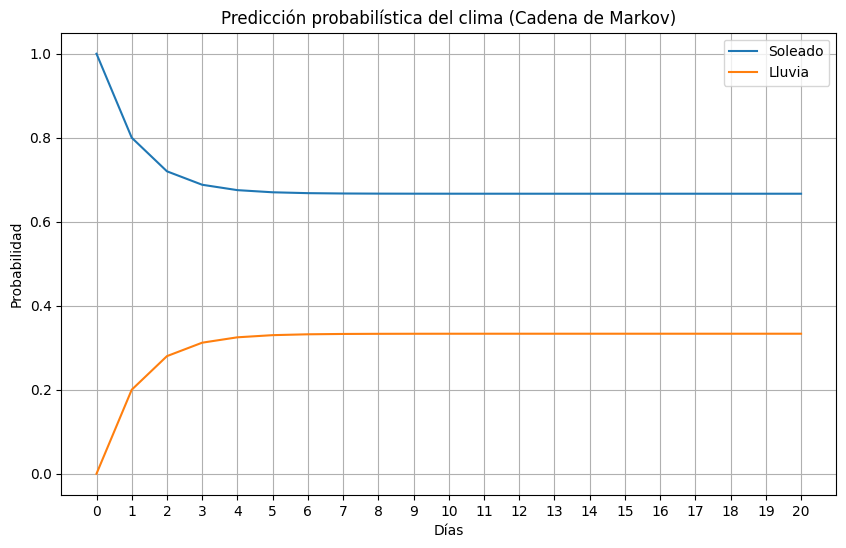

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Matriz de transición
P = np.array([
    [0.8, 0.2],
    [0.4, 0.6]
])

# Estado inicial (100% Soleado, 0% Lluvia)
v0 = np.array([1.0, 0.0])

# Simulación para 10 días
n_dias = 20
estados = [v0]

for _ in range(n_dias):
    v_next = estados[-1] @ P
    estados.append(v_next)

estados = np.array(estados)

# Graficar la evolución
plt.figure(figsize=(10, 6))
plt.plot(estados[:, 0], label='Soleado')
plt.plot(estados[:, 1], label='Lluvia')
plt.title('Predicción probabilística del clima (Cadena de Markov)')
plt.xlabel('Días')
plt.ylabel('Probabilidad')
plt.grid(True)
plt.legend()
plt.xticks(ticks=np.arange(n_dias + 1))
plt.show()


## Explicación del ciclo `for` y del operador `@` en el modelo de Markov

En el código de simulación de la evolución del clima con Cadenas de Markov, usamos la siguiente instrucción:

```python
for _ in range(n_dias):
    v_next = estados[-1] @ P
    estados.append(v_next)
```

### ¿Qué hace este bloque?
`for _ in range(n_dias):`

> - Este bucle repite una acción durante `n_dias` veces (por ejemplo, 10 días).  
> - El guion bajo `_` se usa cuando no necesitas usar el índice de la iteración.  
> - Es equivalente a decir: "Haz esto 10 veces".

`estados[-1] @ P`

> - `estados[-1]` accede al último vector de estado almacenado.
> - El símbolo `@` es el operador de producto matricial en Python.



```
#Ejemplo:

v_next = [0.72, 0.28] @ [[0.8, 0.2],
                         [0.4, 0.6]]
       = [0.688, 0.312]
```



In [10]:
import numpy as np

v = np.array([0.72, 0.28])

P = np.array([[0.8, 0.2],
              [0.4, 0.6]])


v_next = v @ P

print(v_next)

# El operador @ solo funciona correctamente con objetos numpy.array o matrices compatibles.

[0.688 0.312]


# Reflexión sobre el modelo de clima con Cadenas de Markov

Este modelo de Cadenas de Markov para predecir el clima nos permite entender cómo funciona una cadena estocástica, pero **no representa fielmente la realidad climática**. A continuación, se explica por qué.

---

### Limitaciones del modelo

### 1. No contempla la estacionalidad
En la vida real, la probabilidad de lluvia o sol **cambia según la estación del año**. El modelo asume probabilidades fijas (homogéneas), lo cual es irreal.

> Para mayor realismo, se necesitaría una cadena **no homogénea** (una matriz diferente por temporada).

---

### 2. No considera variables externas
El clima depende de múltiples factores como presión, temperatura, vientos, etc.  
Una cadena de Markov simple **no tiene entradas externas**, por lo que no puede representar la dinámica real del clima.

> Esto puede introducir el concepto de **modelos con entradas** o modelos más complejos como redes bayesianas dinámicas.

---

### 3. El modelo solo depende del estado actual
Las Cadenas de Markov de primer orden **ignoran todo el historial anterior**, lo cual no es realista para sistemas como el clima, donde los últimos días pueden influir en el estado actual.

> Esto se puede mejorar usando **modelos de orden superior** o **procesos autoregresivos con memoria**.

---

## Valor educativo del modelo

Aunque no es preciso meteorológicamente, **sí cumple un objetivo didáctico fundamental**:

- Nos permite visualizar **cómo evolucionan sistemas con incertidumbre**.
- Introduce el concepto de **estado estacionario**, equilibrio a largo plazo.
- Facilita la comprensión de **procesos estocásticos discretos**.

---

## Conclusión

> - El modelo no busca predecir el clima con exactitud, sino **mostrar cómo un sistema probabilístico puede estabilizarse** bajo ciertas reglas.  
> - Es una herramienta excelente para introducir conceptos clave de modelación estocástica.

